# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [268]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [269]:
fb2_cvs = pd.read_csv('../data/Fitbit2.csv')
fitbit = pd.DataFrame(fb2_cvs)

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [270]:
fitbit[['Steps','Work_or_Weekend','Months_encoded']]

,Steps,Work_or_Weekend,Months_encoded
0,905,1,5
1,18925,0,5
2,14228,0,5
3,6756,1,5
4,502,1,5
...,...,...,...
362,18588,1,5
363,16382,1,5
364,21913,1,5
365,19023,1,5


In [271]:
# AVERAGE STEPS BY MONTH_ENCODED
fitbitStepsByMonth = fitbit[['Steps', 'Months_encoded']]
fitbitStepsByMonth_mean = fitbitStepsByMonth.groupby('Months_encoded')[['Steps']].mean().round(3)

fitbitStepsByMonth_mean

,Steps
Months_encoded,
1,9892.065
2,8922.867
3,10312.935
4,13079.033
5,10620.097
6,12536.167
7,9193.323
8,11584.774
9,9191.333


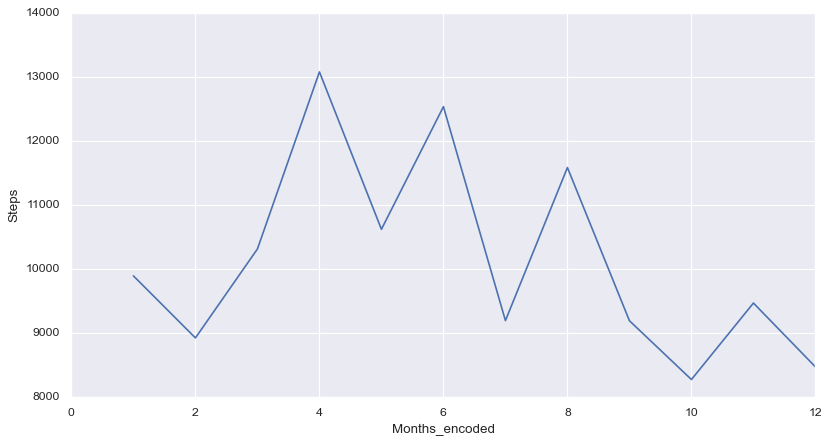

In [272]:
sns.lineplot(x='Months_encoded',y='Steps', data=fitbitStepsByMonth_mean);

In [273]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
fitbitStepsByWeek = fitbit[['Steps', 'Work_or_Weekend']]
fitbitStepsByWeek_mean = fitbitStepsByWeek.groupby('Work_or_Weekend')[['Steps']].mean().round(3)
fitbitStepsByWeek_mean

,Steps
Work_or_Weekend,
0,10064.238
1,10144.573


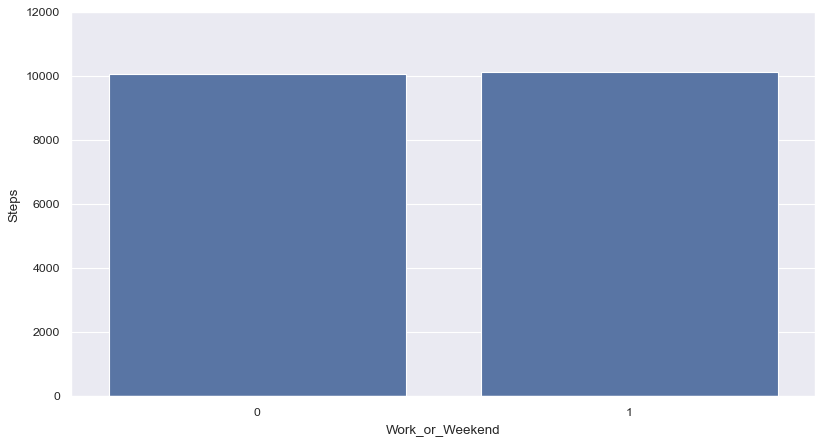

In [274]:
sns.barplot(x = 'Work_or_Weekend', y = 'Steps', data=fitbitStepsByWeek_mean);

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

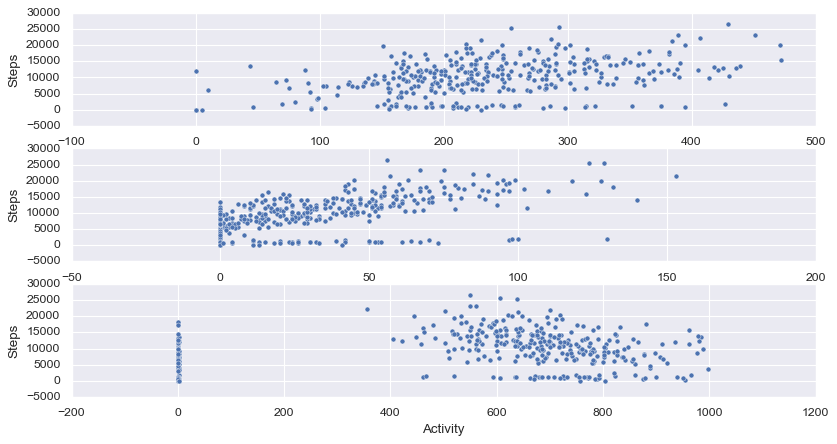

In [275]:
lst = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
fig, axes = plt.subplots(nrows=3,ncols=1)
n=0

plt.ylabel("Steps")
plt.xlabel("Activity")

for column in lst:

    sns.scatterplot(ax= axes[n], data = fitbit, x = fitbit[column], y = fitbit['Steps'], legend=True)
    n+=1




plt.show()



## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [276]:
titanic_csv = pd.read_csv('../data/titanic.csv')
titanic = pd.DataFrame(titanic_csv)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [277]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Gender       1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        1309 non-null   object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [278]:
# NUMERICAL VARIABLES
titanic.select_dtypes(['int', 'float'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [279]:
# CATEGORICAL VARIABLES
titanic.select_dtypes('object')

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [280]:
plt.style.use('classic')
sns.set(rc={'figure.figsize':(12,6)})

#### Use the right visulalization to show the distribution of column `Age`.

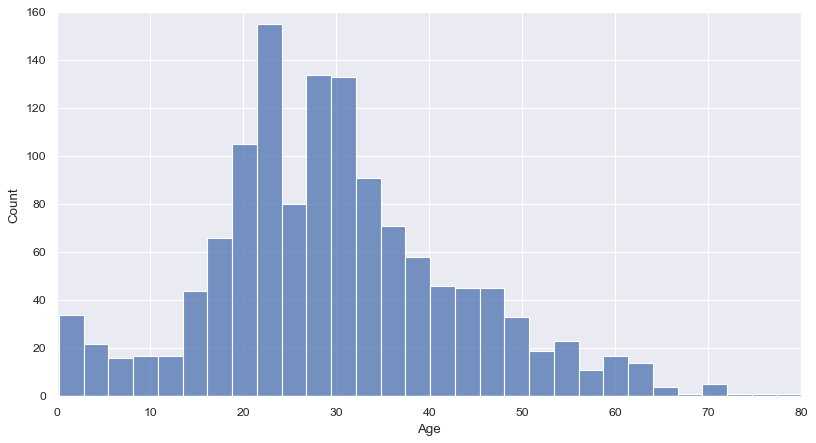

In [281]:
sns.histplot(titanic['Age']);

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

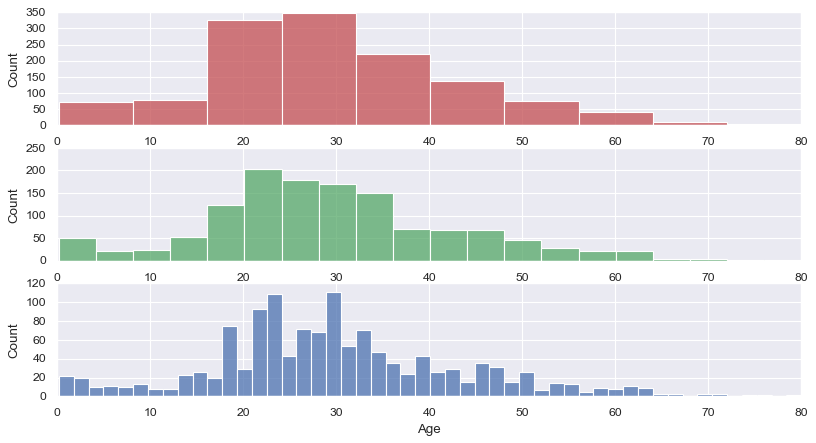

In [282]:
fig, axes = plt.subplots(nrows=3,ncols=1)

f1 = sns.histplot(ax=axes[0],data=titanic['Age'], bins=10, color='r')
f2 = sns.histplot(ax=axes[1],data=titanic['Age'], bins=20, color='g')
f3 = sns.histplot(ax=axes[2],data=titanic['Age'], bins=50, color='b')

#### How does the bin size affect your plot?

When changing the bin size the visualisation of the distribution of the age is more accurate as we divide the plot into more portions


#### Use seaborn to show the distribution of column `Age`.

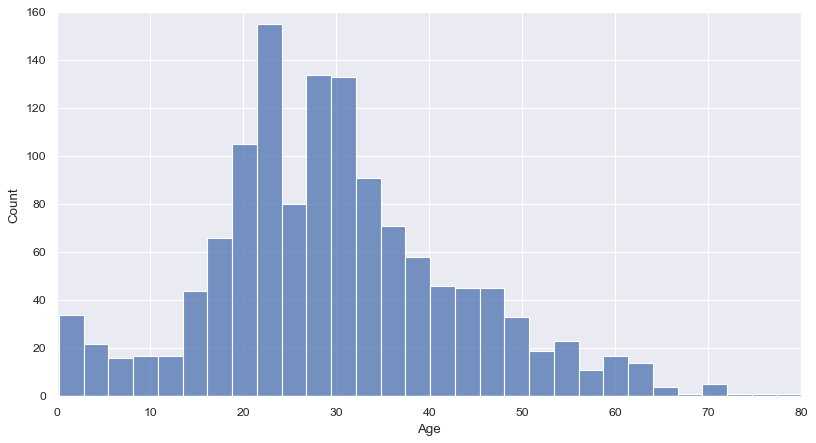

In [283]:
sns.histplot(titanic['Age']);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [292]:
titanic.Gender.value_counts()

Gender
male      843
female    466
Name: count, dtype: int64

<Axes: xlabel='Gender'>

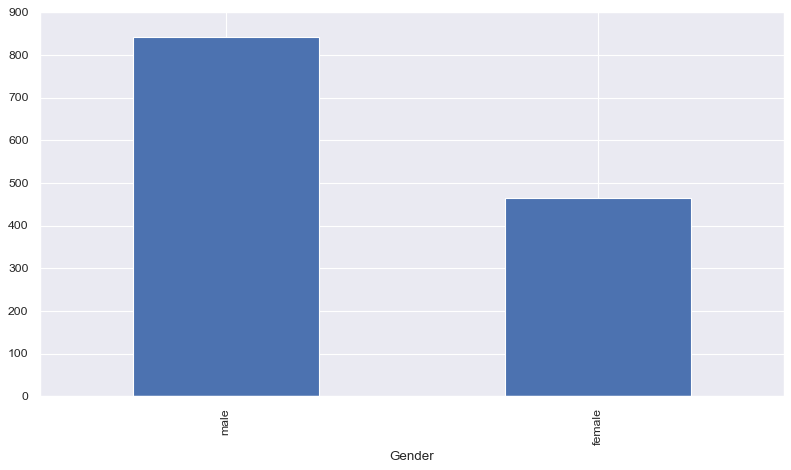

In [291]:
# Method 1 - matplotlib
titanic['Gender'].value_counts().plot(kind='bar')

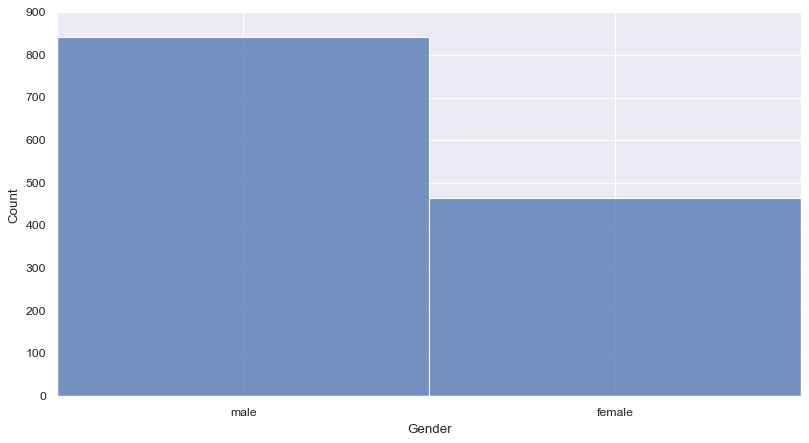

In [294]:
# Method 2 - seaborn
sns.histplot(titanic['Gender']);

#### Use the right plot to visualize the column `Pclass`.

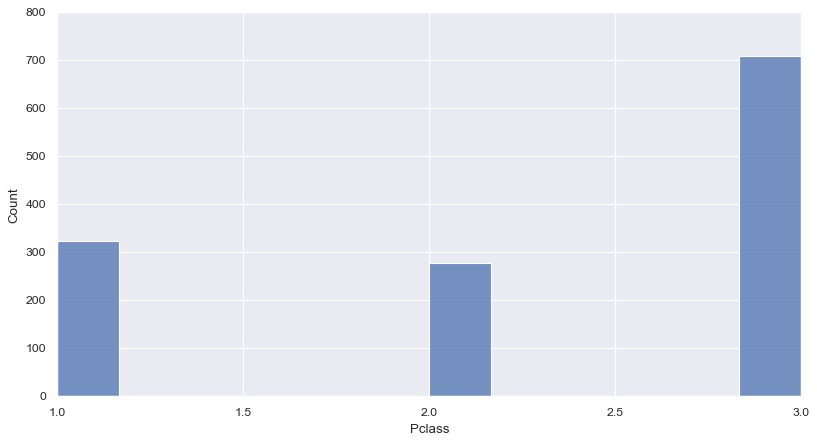

In [298]:
sns.histplot(titanic['Pclass']);

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [311]:
titanic[['Age']].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1309.0,29.879186,13.448335,0.17,22.0,28.5,37.0,80.0


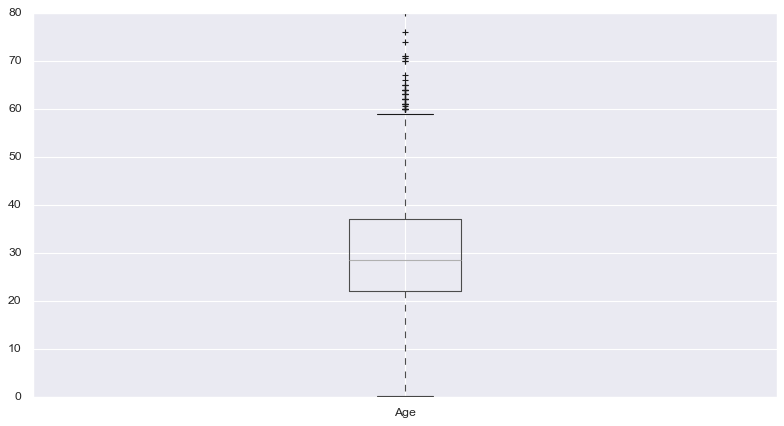

In [309]:
titanic[['Age']].boxplot();

In a boxplot what we see is the summary os the statistics as we would see in a describe() situation.

#### What does the last plot tell you about the feature `Age`?

The boxplot tell as that most passenger in the Titanic were between 22 and 40 years old, having some outliers that would reach from 60 years to 80. The mean would be very close to people on their 30's.

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

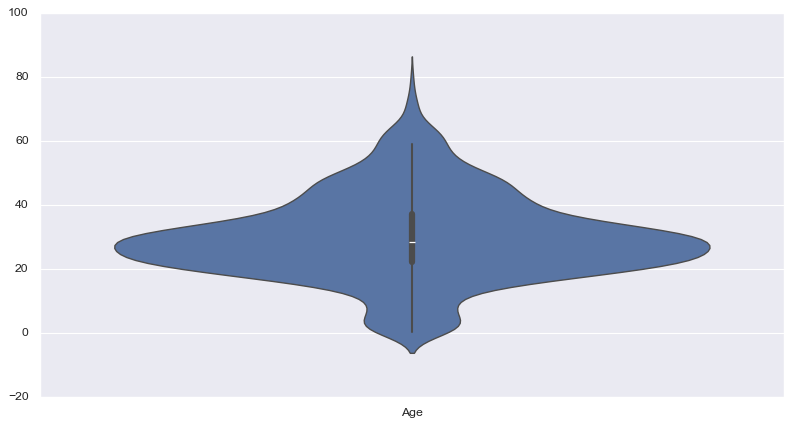

In [318]:
sns.violinplot(titanic[['Age']]);

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here